#  IMDB Feedback Analysis -- Naive Bayes Classifier
I'll apply Naive Bayes Classifier to analyze IMDB feedbacks by sentiment (either positive or negative). Later I'll train this model on Amazon reviews and check the performance

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import re
import warnings
warnings.filterwarnings('ignore')

In [13]:
# load the dataset
path = r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 2\datas\sentiment\imdb_labelled.txt'
df = pd.read_csv(path, delimiter = '\t', header = None)
df.columns = ['review', 'sentiment']
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


The features of this model will be the keywords which are used to express positive attitudes towards a movie. I'll use regular expression to group similar keywords to shorten the number of features. [ETH ESKRIPT](https://eskript.ethz.ch/filmstudies/chapter/describing-and-talking-about-a-film/) has a vocabulary for describing movies. I referred to them to get more precise keywords.

In [14]:
# standartize the reviews column
df['review'] = df['review'].str.lower()

# I'll use regex to group similar terms rather to go with the long list of keywords
keywords = ([r"\b(best|great|first_rate|original|insightful|[^t] recommend(ed)?|must see)\b", "great"],
            [r"\b(excellent|impressive|dazzling|amaz(ing|ed)|enjoy(ed|able)|fascinat(ing|ed)|legendary|perfect(ly|ed|ion)|good|nice)\b", "excellent"],
            [r"\b(mindblowing|thought provoking)\b", "outstanding"],
            [r"\bcomical\b", "comic"],
            [r"\bimaginative\b", "imaginative"],
            [r"\b(unpretentious|outstanding|wonderful|surpris(ing|ed)|intriguing|clever)\b", "wonderful"])

# see if the keyword/s are in the review
for pattern, word in keywords:
    df[str(word)] = df['review'].str.contains(pattern, case = False)
df.head()

,review,sentiment,great,excellent,outstanding,comic,imaginative,wonderful
0,"a very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False
1,not sure who was more lost - the flat characte...,0,False,False,False,False,False,False
2,attempting artiness with black & white and cle...,0,False,False,False,False,False,True
3,very little music or anything to speak of.,0,False,False,False,False,False,False
4,the best scene in the movie was when gerardo i...,1,True,False,False,False,False,False


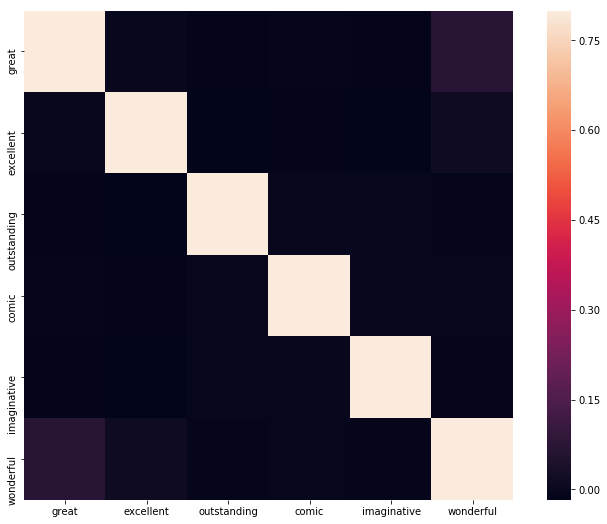

In [15]:
# let's check the correlation among features
fig, ax = plt.subplots(figsize = (12,9))
_ = sns.heatmap(df.loc[:, 'great':].corr(), square = True, vmax=.8)
plt.show()

Confusion matrix shows that most of features are strongly independent. This is important when working with a Naive Bayes Model. Before runnig the model I have to build out the training data. SKLearn requires to specify an outcome variable (data) and inputs (x or independent variables). I'll do that below under the titles data and target. This data is binary / boolean, so I'll apply Bernoulli classifier.

In [16]:
data = df.loc[:, 'great':]
target = df['sentiment']

# instantiate the model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# print the results
print("Bernolulli: Number of mislabeled points out of a total {} points : {}".format(data.shape[0], 
                                                                                     (target != y_pred).sum()))

Bernolulli: Number of mislabeled points out of a total 748 points : 297


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, y_pred)

print(f"{cm[0,0]} true positives, and {cm[0,1]} false positives")
print(f"{cm[1,0]} true negatives, and {cm[1,1]} false negatives")

334 true positives, and 28 false positives
269 true negatives, and 117 false negatives


### Now I'll apply this model to amazon reviews.

In [21]:
# load amazon text data
path1 = r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 2\datas\sentiment\amazon_cells_labelled.txt'
df1 = pd.read_csv(path1, delimiter = '\t', header = None)
df1.columns = ['review', 'sentiment']

# standartize the reviews column
df1['review'] = df1['review'].str.lower()

# see if the keyword/s are in the review
for pattern, word in keywords:
    df1[str(word)] = df1['review'].str.contains(pattern, case = False)
df1.loc[:, 'great':].corr()

,great,excellent,outstanding,comic,imaginative,wonderful
great,1.000000,-0.054318,NaN,NaN,NaN,-0.016997
excellent,-0.054318,1.000000,NaN,NaN,NaN,0.117369
outstanding,NaN,NaN,NaN,NaN,NaN,NaN
comic,NaN,NaN,NaN,NaN,NaN,NaN
imaginative,NaN,NaN,NaN,NaN,NaN,NaN
wonderful,-0.016997,0.117369,NaN,NaN,NaN,1.000000


Keywords in 'outstanding', 'comic' and 'imaginative' keyword groups are very specific to mavies, it returns NaN values when I calculate correlation among features. I decide to drop these columns.

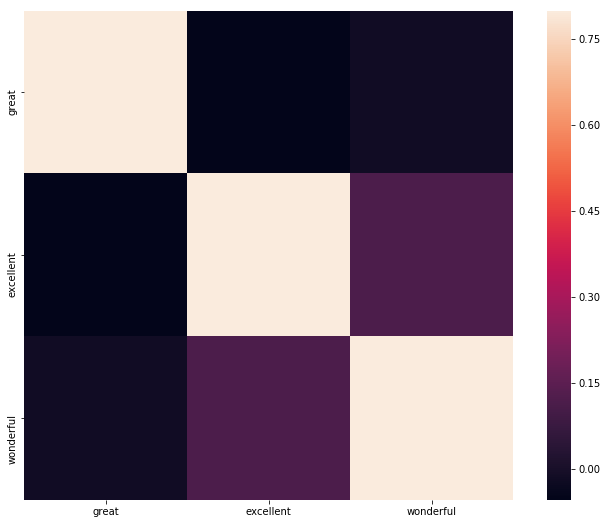

In [22]:
# drop columns with missing values 
df1.drop(columns = ['outstanding', 'comic', 'imaginative'], inplace = True)

# check the correlation among features
fig, ax = plt.subplots(figsize = (12,9))
_ = sns.heatmap(df1.loc[:, 'great':].corr(), square = True, vmax=.8)
plt.show()

In [23]:
data1 = df1.loc[:, 'great':]
target1 = df1['sentiment']

# fit our model to the data
bnb.fit(data1, target1)

# classify, storing the result in a new variable
bnb_y_pred = bnb.predict(data1)

# print the results
print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != bnb_y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 305
